In [1]:
import numpy as np
import numpy.random as rand
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import plotly.graph_objects as go

# Algorithm implementation

In [2]:
def rozenbrok_func(coord):
  return 100.0*(coord[1]-coord[0]**2.0)**2.0 + (1-coord[0])**2.0

def himmelblau_func(coord):
  return (coord[0]**2+coord[1]-11)**2+(coord[0]+coord[1]*coord[1]-7)**2

In [3]:
def annealing(func):
  T0 = 100
  T = T0
  C = 1
  beta=round(rand.uniform(0.8,0.99),3)
  eta=0
  N = 1000000
  x0 = np.array([1,-1])
  x = x0
  T_arr = [T]
  x_ar = [x.tolist()]

  print("Temperature attenuation coefficient:  ", beta)
  print("Initial vector x:", x0)

  for i in range(0,N):
    delta_x = rand.normal(loc=0, scale=np.sqrt(T), size=2)
    y = x + delta_x
    f_y = func(y)
    f_x = func(x) 
    delta_f = f_y-f_x
    if f_y <= f_x:
      x=y
    else: 
      eta = rand.uniform(0,1)
      eta_compare = np.exp(-delta_f/(C*T))
      if eta <= eta_compare:
        x = y
    T = beta*T
    x_ar.append(x.tolist())
    T_arr.append(T)
  print("Final point:", x)
  return x, x_ar, T_arr

In [5]:
point_roz, x_ar_roz, T_arr = annealing(rozenbrok_func)

Temperature attenuation coefficient:   0.951
Initial vector x: [ 1 -1]
Final point: [3.15124515 9.93368807]


In [6]:
point_him, x_ar_him, _ = annealing(himmelblau_func)

Temperature attenuation coefficient:   0.953
Initial vector x: [ 1 -1]
Final point: [ 3.58442834 -1.84812653]


# Algorithm Visualization

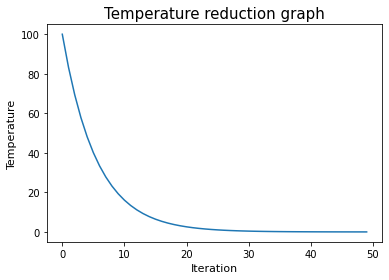

In [ ]:
# Temperature reduction graph in algorithm for rozenbrok function
plt.plot(T_arr[:50])
plt.title('Temperature reduction graph', fontsize = 15)
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Temperature', fontsize=11)
plt.plot;

In [ ]:
def rozen(x,y):
  return 100.0*(y-x**2.0)**2.0 + (1-x)**2.0

def himel(x,y):
  return (x**2.0+y-11)**2.0 + (x+y**2.0-7)**2.0

opt_points_roz = [[1, 1]]
opt_points_himel = [[3,2], [-2.8, 3.1], [3.5, -1.8], [-3.7, -3.2]]

def plot_func(x_ar, point, opt_points, range_axes, func_name):
  x1 = np.linspace(point[0] - range_axes , point[0] + range_axes, 40)
  x2 = np.linspace(point[1] - range_axes , point[1] + range_axes, 40)
  X1, X2 = np.meshgrid(x1, x2)
  Z = func_name(X1, X2)
  fig = plt.figure(figsize = (15,10))
  contours = plt.contour(X1, X2, Z, 500)
  plt.title('Trajectory in the annealing method', fontsize = 20)
  plt.plot([t[0] for t in x_ar], [t[1] for t in x_ar])
  plt.plot([t[0] for t in x_ar], [t[1] for t in x_ar], '*')
  for pnt in opt_points:
    plot=plt.scatter(pnt[0], pnt[1], marker = '*', c = 'b',s = 300)
  plt.xlabel('x1', fontsize=11)
  plt.ylabel('x2', fontsize=11)
  plt.colorbar()
  plt.legend(loc = "upper right")
  plt.show()

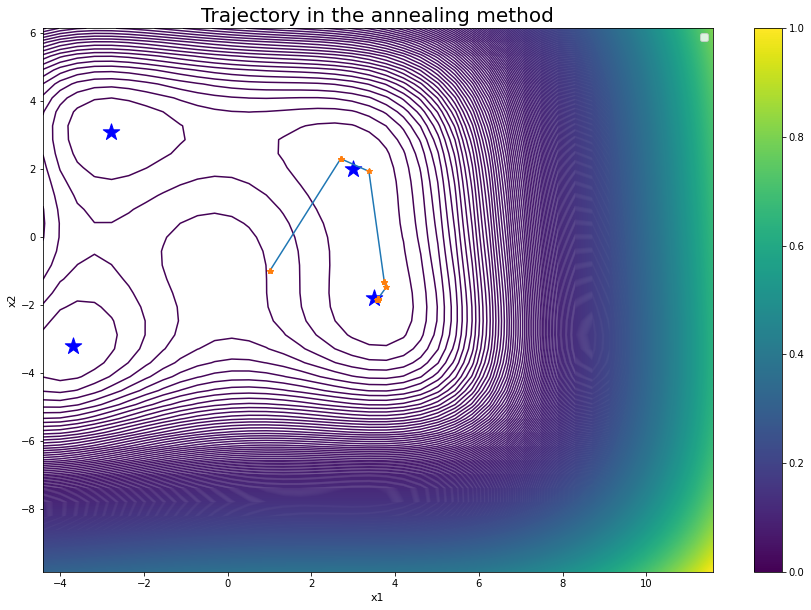

In [ ]:
plot_func(x_ar_him, point_him, opt_points = opt_points_himel, range_axes = 8, func_name = himel)

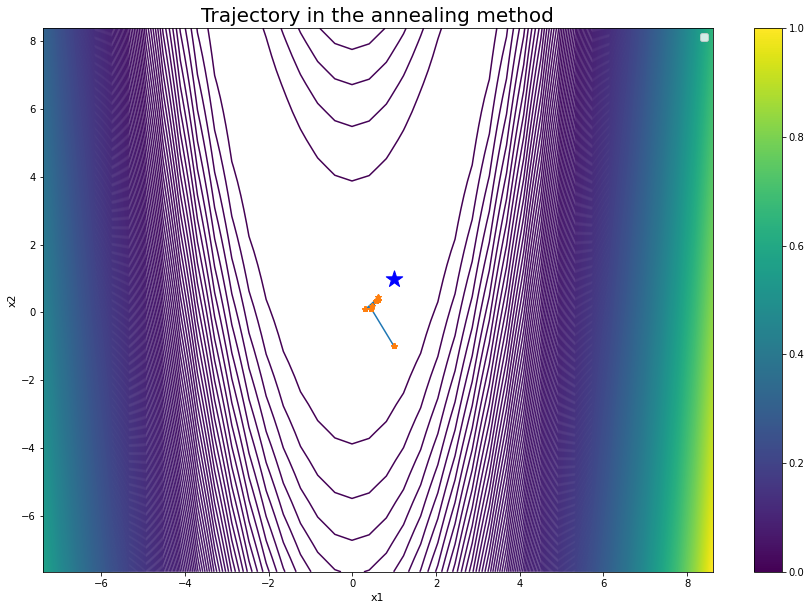

In [ ]:
plot_func(x_ar_roz, point_roz, opt_points = opt_points_roz, range_axes = 8, func_name = rozen)